# 100 囚犯抽签问题仿真实验

## 编号：2025-02

本实验基于 Python 语言，利用随机数仿真方法，模拟 100 囚犯抽签问题，比较以下两种策略在相同条件下的成功概率：

- 随机策略
- 循环策略

通过大量实验次数，统计各策略成功率，并绘制结果图表。最后对实验结果进行分析，并与理论值进行对比。


## 导入必要库

In [1]:
import numpy as np  # 导入 numpy 库用于随机数与数组操作
import matplotlib.pyplot as plt  # 导入 matplotlib 库用于绘图

## 定义随机策略仿真函数

In [2]:
def simulate_random_strategy(N, K):
    """
    随机策略：每个囚犯随机打开K个盒子寻找自己的编号。
    参数：
        N - 囚犯数量
        K - 每名囚犯最大尝试次数
    返回：
        布尔值，表示该轮是否全体囚犯成功。
    """
    boxes = np.random.permutation(N)  # 随机生成0~N-1的排列，模拟盒子编号顺序
    for prisoner in range(N):  # 遍历每名囚犯
        opened_boxes = np.random.choice(N, K, replace=False)  # 随机选取K个盒子
        if prisoner not in boxes[opened_boxes]:  # 若未找到自己的编号
            return False  # 本轮失败
    return True  # 所有人均成功


## 定义循环策略仿真函数

In [3]:
def simulate_loop_strategy(N, K):
    """
    循环策略：每个囚犯从自己编号的盒子开始，依照纸条编号跳转。
    参数：
        N - 囚犯数量
        K - 每名囚犯最大尝试次数
    返回：
        布尔值，表示该轮是否全体囚犯成功。
    """
    boxes = np.random.permutation(N)  # 随机生成0~N-1的排列，模拟盒子编号顺序
    for prisoner in range(N):  # 遍历每名囚犯
        attempts = 0  # 尝试次数初始化
        next_box = prisoner  # 从自己编号的盒子开始
        while attempts < K:
            if boxes[next_box] == prisoner:  # 找到自己的编号
                break
            else:
                next_box = boxes[next_box]  # 跳转至下一个盒子
                attempts += 1
        if attempts == K:  # 超出K次未找到
            return False  # 本轮失败
    return True  # 所有人均成功


## 定义多轮仿真执行函数

In [4]:
def run_simulation(N=100, K=50, T=10000):
    """
    执行T轮仿真，分别统计随机策略与循环策略的成功次数。
    参数：
        N - 囚犯数量
        K - 每名囚犯最大尝试次数
        T - 仿真轮数
    返回：
        随机策略成功率与循环策略成功率
    """
    random_success = 0  # 随机策略成功次数
    loop_success = 0  # 循环策略成功次数

    for _ in range(T):
        if simulate_random_strategy(N, K):
            random_success += 1
        if simulate_loop_strategy(N, K):
            loop_success += 1

    random_rate = random_success / T  # 计算随机策略成功率
    loop_rate = loop_success / T  # 计算循环策略成功率

    return random_rate, loop_rate


## 绘制策略成功率柱状图

In [5]:
def plot_results(random_rate, loop_rate):
    """
    绘制两种策略成功率对比柱状图。
    参数：
        random_rate - 随机策略成功率
        loop_rate - 循环策略成功率
    """
    strategies = ['Random Strategy', 'Loop Strategy']  # 策略名称
    rates = [random_rate, loop_rate]  # 成功率数据

    plt.bar(strategies, rates, color=['steelblue', 'seagreen'])  # 绘制柱状图
    plt.ylabel('Success Rate')  # Y轴标签
    plt.title('100 Prisoners Problem: Success Rate Comparison')  # 图表标题
    plt.ylim(0, 1)  # Y轴范围
    for i, rate in enumerate(rates):
        plt.text(i, rate + 0.01, f"{rate:.3f}", ha='center')  # 显示成功率数值
    plt.show()


## 绘制循环策略成功次数分布直方图

In [6]:
def plot_loop_distribution(N=100, K=50, T=10000):
    """
    绘制循环策略在T轮仿真中的成功分布直方图。
    参数：
        N - 囚犯数量
        K - 每名囚犯最大尝试次数
        T - 仿真轮数
    """
    success_list = []  # 用于记录每轮是否成功

    for _ in range(T):
        result = simulate_loop_strategy(N, K)
        success_list.append(result)

    plt.hist([int(x) for x in success_list], bins=2, color='seagreen', rwidth=0.8)  # 将布尔值转为0或1
    plt.xticks([0, 1], ['Fail', 'Success'])
    plt.ylabel('Counts')
    plt.title('Loop Strategy: Success/Failure Distribution')
    plt.show()


## 执行仿真并输出结果

In [7]:
def main():
    """
    主程序函数，设置仿真参数，执行仿真并输出结果，绘制图表。
    """
    # 设置仿真参数
    N = 100      # 囚犯数量
    K = 50       # 每名囚犯最大尝试次数
    T = 10000    # 仿真轮数

    random_rate, loop_rate = run_simulation(N, K, T)    # 执行仿真

    print(f"Random Strategy Success Rate: {random_rate:.3f}")   # 输出成功率
    print(f"Loop Strategy Success Rate: {loop_rate:.3f}")

    plot_results(random_rate, loop_rate)    # 绘制成功率对比柱状图

    plot_loop_distribution(N, K, T)    # 绘制循环策略成功分布直方图


## 主程序入口

Random Strategy Success Rate: 0.000
Loop Strategy Success Rate: 0.311


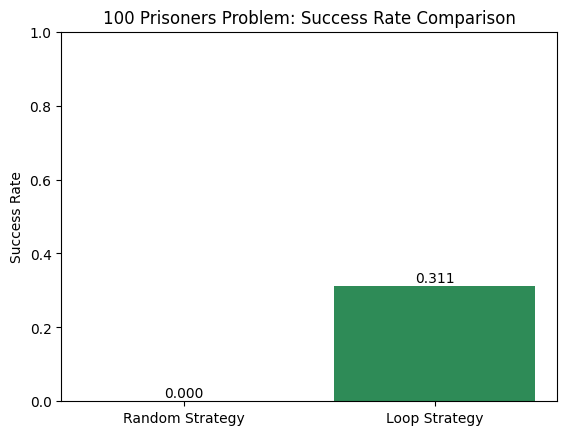

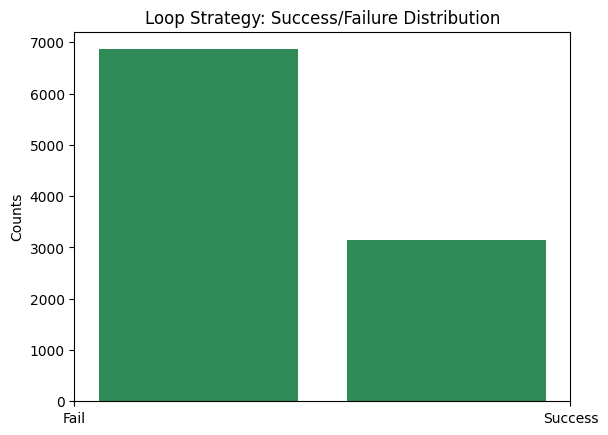

In [8]:
if __name__ == "__main__":
    main()  # 调用主函数

## 理论计算最优策略的成功率（基于排列循环理论）



### 成功概率表达式

令 $L_{\max}$ 表示随机排列最大循环长度，则成功概率为：
$
P_{\text{success}} = P(L_{\max} \leq K)
$

根据排列循环理论，$P(L_{\max} \leq K)$ 的计算可以用**包含排除原理**及**斯特林数**展开，但较为复杂。


### 近似计算方法

最大循环长度超过 $K$ 的概率近似为：
$
P(L_{\max} > K) \approx \sum_{l=K+1}^{N} \frac{1}{l}
$

因此成功概率约为：
$
P_{\text{success}} \approx 1 - \sum_{l=K+1}^{N} \frac{1}{l} = \prod_{i=K+1}^{N} \left(1 - \frac{1}{i}\right)
$


### 数值示例

当 $N=100$, $K=50$ 时，计算得：
$
P_{\text{success}} \approx \prod_{i=51}^{100} \left(1 - \frac{1}{i}\right) \approx 0.3118
$

即约为31.18%。

### 实际对比

- **随机策略** 成功率远低，趋近于 $ (0.5)^{100} $，几乎为 0。
- **循环策略** 成功率约为 31%，符合理论值 31.18%。

### 结论

- 循环策略利用排列循环结构，显著提高成功概率。
- 理论成功率约31.18%，远高于随机策略的极低概率。
